# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.7 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

# Start running code from here

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
print(states)
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.         -6.65278625 -1.5        -0.          0.
   6.83172083  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.         -6.4669857  -1.5         0.          0.
  -6.83172083  6.          0.          0.        ]]
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        print(actions.shape)
        print(actions.dtype)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)

        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
Total score (averaged over agents) this episode: -0.004999999888241291
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
Total score (averaged over agents) this episode: -0.004999999888241291
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
Total score (averaged over agents) this episode: -0.004999999888241291
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)
float64
(2, 2)


When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
# Importing section

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import random
import numpy as np
import copy

from collections import deque

# Device Section

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper - parameters

In [8]:
BUFFER_SIZE = int(1e5)  
BATCH_SIZE = 128        
GAMMA = 0.99            
TAU = 1e-2              
LR_ACTOR = 1e-4         
LR_CRITIC = 1e-3        
WEIGHT_DECAY = 0.0000   
UPDATE_FREQUENCY = 1
NUM_UPDATES = 1

# Buffer Class

In [9]:
class Replay_Buffer():
    def __init__(self, capacity, batch_size, seed):
        self.capacity = capacity
        self.batch_size = batch_size
        self.seed = random.seed(seed)
        self.buffer = deque(maxlen = self.capacity)
        return
    
    def add(self, state, action, reward, next_state, is_done):
        state_0 = state[0]
        state_1 = state[1]
        action_0 = action[0]
        action_1 = action[1]
        reward_0 = reward[0]
        #print('reward first player ', reward_0)
        reward_1 = reward[1]
        #print('reward second player ', reward_1)
        next_state_0 = next_state[0]
        next_state_1 = next_state[1]
        is_done_0 = is_done[0]
        is_done_1 = is_done[1]
        
        self.buffer.append((state_0, action_0, reward_0, next_state_0, is_done_0))
        self.buffer.append((state_1, action_1, reward_1, next_state_1, is_done_1))
        return
    
    def sample(self):
        batch = random.sample(self.buffer, k = self.batch_size)
        
        states, actions, rewards, next_states, is_dones = zip(*batch)
        
        states = torch.FloatTensor(states).view(self.batch_size, -1).to(device)
        actions = torch.FloatTensor(actions).view(self.batch_size, -1).to(device)
        rewards = torch.FloatTensor(rewards).view(self.batch_size, -1).to(device)
        next_states = torch.FloatTensor(next_states).view(self.batch_size, -1).to(device)
        is_dones = torch.FloatTensor(np.float32(is_dones)).view(self.batch_size, -1).to(device)
        
        return (states, actions, rewards, next_states, is_dones)
    
    def __len__(self):
        return len(self.buffer)    

# Noise

In [10]:
class OUNoise():
    def __init__(self, size, seed = 10, mu = 0., theta = 0.1, sigma =0.02):
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()
        return
    
    def reset(self):
        self.state = copy.copy(self.mu)

    def sample(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([np.random.randn() for i in range(len(x))])
        self.state = x + dx
        return self.state

# Nets

In [11]:
class Actor(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, seed):
        super (Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_sizes = hidden_sizes
        
        self.Linear_1 = nn.Linear(self.input_size, self.hidden_sizes[0])
        self.Linear_2 = nn.Linear(self.hidden_sizes[0], self.hidden_sizes[1])
        self.Linear_3 = nn.Linear(self.hidden_sizes[1], self.output_size)
        self.bn0 = nn.BatchNorm1d(self.input_size)
        self.bn1 = nn.BatchNorm1d(self.hidden_sizes[0])
        self.bn2 = nn.BatchNorm1d(self.hidden_sizes[1])
        
        self.relu = nn.ReLU()
        
        self.reset_parameters()
        return
    
    def reset_parameters(self):
        # This is useful to initialize parameters
        normalization_factor_1 = self.Linear_1.weight.data.size()[0]
        value_1 = 1. / np.sqrt(normalization_factor_1)
        self.Linear_1.weight.data.uniform_(-value_1, value_1)
        
        normalization_factor_2 = self.Linear_2.weight.data.size()[0]
        value_2 = 1. / np.sqrt(normalization_factor_2)
        self.Linear_2.weight.data.uniform_(-value_2, value_2)
        
        self.Linear_3.weight.data.uniform_(-3e-3, 3e-3)
        return
    
    def forward(self, state):
        state = self.bn0(state)
        state = self.relu(self.bn1(self.Linear_1(state)))
        state = self.relu(self.bn2(self.Linear_2(state)))
        actions = F.tanh(self.Linear_3(state))
        return actions
        
class Critic(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, seed):
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_sizes = hidden_sizes
            
        self.Linear_1 = nn.Linear(self.input_size, self.hidden_sizes[0])
        self.Linear_2 = nn.Linear(self.hidden_sizes[0] + self.output_size, self.hidden_sizes[1])
        #self.Linear_3 = nn.Linear(self.hidden_sizes[1], self.hidden_sizes[2])
        self.Linear_4 = nn.Linear(self.hidden_sizes[1], 1)
            
        # CHECK! NOTICE HERE THEY USE LEAKY RELU
        self.relu = nn.ReLU()
            
        self.reset_parameters()
        return
            
    def reset_parameters(self):
        normalization_factor_1 = self.Linear_1.weight.data.size()[0]
        value_1 = 1. / np.sqrt(normalization_factor_1)
        self.Linear_1.weight.data.uniform_(-value_1, value_1)
        
        normalization_factor_2 = self.Linear_2.weight.data.size()[0]
        value_2 = 1. / np.sqrt(normalization_factor_2)
        self.Linear_2.weight.data.uniform_(-value_2, value_2)
            
        #normalization_factor_3 = self.Linear_3.weight.data.size()[0]
        #value_3 = 1. / np.sqrt(normalization_factor_3)
        #self.Linear_2.weight.data.uniform_(-value_3, value_3)
        
        self.Linear_4.weight.data.uniform_(-3e-3, 3e-3)
        return
        
    def forward(self, state, action):
        state = F.leaky_relu(self.Linear_1(state))
        state_action = torch.cat((state, action), dim = 1)
        state = F.leaky_relu(self.Linear_2(state_action))
        #state = F.leaky_relu(self.Linear_3(state))
        state = self.Linear_4(state)
            
        return state       

# Agent

In [12]:
class Agent():
    def __init__(self, input_size, output_size, hidden_sizes_actor, hidden_sizes_critic, random_seed):
        
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_sizes_actor = hidden_sizes_actor
        self.hidden_sizes_critic = hidden_sizes_critic
        self.seed = random.seed(random_seed)
        
        # Notice. It is not important to initialize the actor and the critic targets since by default actor and actor_tg, and similarly critic and critic_tg,
        # have the same weights
        self.actor = Actor(self.input_size, self.hidden_sizes_actor, self.output_size, random_seed).to(device)
        self.actor_tg = Actor(self.input_size, self.hidden_sizes_actor, self.output_size, random_seed).to(device)
        
        self.critic = Critic(self.input_size, self.hidden_sizes_critic, self.output_size, random_seed).to(device)
        self.critic_tg = Critic(self.input_size, self.hidden_sizes_critic, self.output_size, random_seed).to(device)
        
        self.actor_optimizer = optim.Adam (self.actor.parameters(), lr = LR_ACTOR)
        self.critic_optimizer = optim.Adam (self.critic.parameters(), lr = LR_CRITIC)
        
        self.noise = OUNoise(self.output_size, random_seed)
        self.buffer = Replay_Buffer(BUFFER_SIZE, BATCH_SIZE, random_seed)
    
    def act(self, state, parameter_noise = True):
        state = torch.FloatTensor(state).to(device)
        self.actor.eval()
        
        with torch.no_grad():
            action = self.actor(state).cpu().data.numpy()
        
        self.actor.train()
        
        if parameter_noise == True:
            action += self.noise.sample()
            
        return  np.clip(action, -1, 1)
    
    def reset(self):
        self.noise.reset()
        
    def step(self, state, action, reward, next_state, is_done, count):
        self.buffer.add(state, action, reward, next_state, is_done)
    
        if (len(self.buffer) > BATCH_SIZE) and (count % UPDATE_FREQUENCY == 0):
            policy_loss = 0
            critic_loss = 0
            
            for i in range(NUM_UPDATES):
                batch = self.buffer.sample()
                policy_loss_temp, critic_loss_temp = self.learn(batch, GAMMA)
                
                policy_loss += policy_loss_temp
                critic_loss += critic_loss_temp
            
            return policy_loss, critic_loss
        return 0, 0
    
    def learn(self, batch, gamma):
        states = batch[0]
        actions = batch[1]
        rewards = batch[2]
        next_states = batch[3]
        is_dones = batch[4]
        
        # UPDATING CRITIC
        
        # Target Values of the Critic
        
        next_actions = self.actor_tg(next_states)
        Q_next_states = self.critic_tg(next_states, next_actions)
        Q_targets = rewards + GAMMA * Q_next_states * (1.0 - is_dones)
        
        # Q_values 
        
        Q_values = self.critic(states, actions)
        critic_loss = F.mse_loss(Q_targets.detach(), Q_values)
        
        # Updates
        
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        torch.nn.utils.clip_grad_norm_(self.critic.parameters(), 1)
        self.critic_optimizer.step()
        
        # UPDATING POLICY
        
        actions_pred = self.actor(states)
        Q = self.critic(states, actions_pred)
        policy_loss = -Q.mean()
        
        self.actor_optimizer.zero_grad()
        torch.nn.utils.clip_grad_norm_(self.actor.parameters(), 1)
        policy_loss.backward()
        self.actor_optimizer.step()
        
        # SOFT_UPDATE
        
        self.soft_update(self.actor, self.actor_tg, TAU)
        self.soft_update(self.critic, self.critic_tg, TAU)
        
        return policy_loss, critic_loss
        
    def soft_update(self, net, net_tg, TAU):
        
        for target_param, local_param in zip(net_tg.parameters(), net.parameters()):
            target_param.data.copy_(TAU*local_param.data + (1.0-TAU)*target_param.data)
            
        return


# Instatiating the object

In [13]:
brain.vector_observation_space_size

8

In [17]:
hidden_layers_actor = [256, 128]
hidden_layers_critic = [256, 128]
agent = Agent(24, 2, hidden_layers_actor, hidden_layers_critic, 1)

In [15]:
agent.actor.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic.load_state_dict(torch.load('checkpoint_critic.pth'))
agent.actor_tg.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_tg.load_state_dict(torch.load('checkpoint_critic.pth'))

print(len(agent.buffer))

0


In [15]:
def main(num_episodes = 20000):
    count = 1
    scores = []
    scores_deque = deque(maxlen = 100)
    policy_losses = []
    critic_losses = []
    
    for ep in range(1, num_episodes):

        env_info = env.reset(train_mode = True)[brain_name]
        states_main = env_info.vector_observations
        score = np.zeros(2)
        agent.reset()
        
        while True:
            actions_main = agent.act(states_main) 

            env_info = env.step(actions_main)[brain_name]
            next_states_main = env_info.vector_observations
            rewards_main = env_info.rewards
            is_dones_main = env_info.local_done
            
            policy_loss, critic_loss = agent.step(states_main, actions_main, rewards_main, next_states_main, is_dones_main, count)
            
            policy_losses.append(policy_loss)
            critic_losses.append(critic_loss)
            
            score += rewards_main                     
            states_main = next_states_main 
            
            if np.any(is_dones_main):
                count += 1
                #print('score is ',score)
                final_score = np.max(score)
                scores.append(final_score)
                scores_deque.append(final_score)
                #print('The score at episode {} is {}'.format(ep, final_score))
                break
            
            count += 1
            
        if ep % 10 == 0:
            print('Mean last 10 episodes: ', np.mean(scores[-10:]))
        
        if ep % 100 == 0:
            torch.save(agent.actor.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic.state_dict(), 'checkpoint_critic.pth')
            print('\n### Episode {}\tAverage Score: {:.2f} ###\n'.format(ep, np.mean(scores_deque)))   

        if len(scores_deque) == 100 and (np.mean(scores_deque) >= 0.5):
            print('The environment was solved with average', np.mean(scores_deque))
            torch.save(agent.actor.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic.state_dict(), 'checkpoint_critic.pth')
            return scores
            

In [18]:
scores = main(2000)

Mean last 10 episodes:  0.0
Mean last 10 episodes:  0.0
Mean last 10 episodes:  0.0
Mean last 10 episodes:  0.0
Mean last 10 episodes:  0.0
Mean last 10 episodes:  0.0
Mean last 10 episodes:  0.0
Mean last 10 episodes:  0.0
Mean last 10 episodes:  0.040000000596
Mean last 10 episodes:  0.0

### Episode 100	Average Score: 0.00 ###

Mean last 10 episodes:  0.0
Mean last 10 episodes:  0.0
Mean last 10 episodes:  0.040000000596
Mean last 10 episodes:  0.040000000596
Mean last 10 episodes:  0.0590000009164
Mean last 10 episodes:  0.0580000009388
Mean last 10 episodes:  0.0480000007898
Mean last 10 episodes:  0.0970000015572
Mean last 10 episodes:  0.0970000015572
Mean last 10 episodes:  0.0860000014305

### Episode 200	Average Score: 0.05 ###

Mean last 10 episodes:  0.0850000014529
Mean last 10 episodes:  0.020000000298
Mean last 10 episodes:  0.1670000026
Mean last 10 episodes:  0.109000001661
Mean last 10 episodes:  0.0900000013411
Mean last 10 episodes:  0.10000000149
Mean last 10 episo

In [19]:
import matplotlib.pyplot as plt

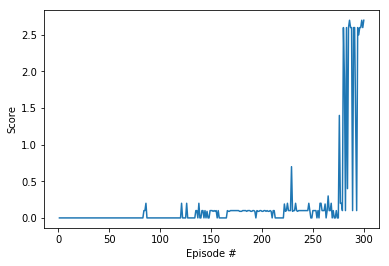

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
